#Housing Analysis

Business Problem: 

Real estate company interested in current trends in what affects housing sales, in order to make recommndations to clients? 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
from datetime import datetime
df["date"]=pd.DatetimeIndex(df["date"]).year
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
#pososibly ignore date, view, sqft_above, sqft_basement, yr_renovated, 
#zipcode, lat, long, sqft_living15, sqft_lot15



In [8]:
len(df)

21597

In [9]:
df.nlargest(10, 'bedrooms')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
8748,1773100755,2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
19239,8812401450,2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
4092,1997200215,2014,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
4231,2902200015,2015,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,...,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450
6073,9822700190,2014,1280000.0,9,4.50,3650,5000,2.0,0.0,0.0,...,8,2530,1120.0,1915,2010.0,98105,47.6604,-122.289,2510,5000
8537,424049043,2014,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,...,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
16830,8823900290,2015,1400000.0,9,4.00,4620,5508,2.5,0.0,0.0,...,11,3870,750.0,1915,0.0,98105,47.6684,-122.309,2710,4320


In [10]:
df = df.drop([15856])  #dropping entry with 33 bedrooms but only 1.75 baths, 1 floor, andn 1620 sqft

In [11]:
df.nlargest(10, 'price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,8907500070,2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
1313,7558700030,2015,5300000.0,6,6.00,7390,24829,2.0,1.0,NaN,...,12,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1162,1247600105,2014,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,...,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
8085,1924059029,2014,4670000.0,5,6.75,9640,13068,1.0,1.0,4.0,...,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
2624,7738500731,2014,4500000.0,5,5.50,6640,40014,2.0,1.0,4.0,...,12,6350,290.0,2004,0.0,98155,47.7493,-122.280,3030,23408
8629,3835500195,2014,4490000.0,4,3.00,6430,27517,2.0,0.0,0.0,...,12,6430,0.0,2001,0.0,98004,47.6208,-122.219,3720,14592


In [12]:
##cutting out the top 10% most expensve homes, to focus on more middle class and lower homes.  
df = df[(df['price'] < np.quantile(df['price'], 0.9))]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19435 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19435 non-null  int64  
 1   date           19435 non-null  int64  
 2   price          19435 non-null  float64
 3   bedrooms       19435 non-null  int64  
 4   bathrooms      19435 non-null  float64
 5   sqft_living    19435 non-null  int64  
 6   sqft_lot       19435 non-null  int64  
 7   floors         19435 non-null  float64
 8   waterfront     17283 non-null  float64
 9   view           19378 non-null  float64
 10  condition      19435 non-null  int64  
 11  grade          19435 non-null  int64  
 12  sqft_above     19435 non-null  int64  
 13  sqft_basement  19435 non-null  object 
 14  yr_built       19435 non-null  int64  
 15  yr_renovated   15977 non-null  float64
 16  zipcode        19435 non-null  int64  
 17  lat            19435 non-null  float64
 18  long  

In [13]:
df=df.drop_duplicates('id')


In [14]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2130
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3422
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [15]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.926800e+04,19268.000000,19268.000000,19268.000000,19268.000000,19268.000000,1.926800e+04,19268.000000,17138.000000,19211.000000,19268.000000,19268.000000,19268.000000,19268.000000,15846.000000,19268.000000,19268.000000,19268.000000,19268.000000,19268.000000
mean,4.619250e+09,2014.318092,450973.118123,3.300291,2.017036,1917.373573,1.420249e+04,1.463073,0.002334,0.147936,3.405335,7.456301,1660.429001,1970.739724,68.861732,98078.761781,47.553730,-122.213403,1881.096793,12228.335894
std,2.877850e+09,0.465748,177634.836437,0.875036,0.688563,721.411269,3.867682e+04,0.536007,0.048256,0.587727,0.644307,0.967747,679.760108,29.006717,364.204272,53.290667,0.143059,0.143001,574.108831,25712.490700
min,1.000102e+06,2014.000000,78000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.143701e+09,2014.000000,310000.000000,3.000000,1.500000,1380.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,1951.000000,0.000000,98033.000000,47.452200,-122.331000,1460.000000,5020.750000
50%,3.922150e+09,2014.000000,425000.000000,3.000000,2.000000,1820.000000,7.480000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1480.000000,1974.000000,0.000000,98065.000000,47.562800,-122.235000,1770.000000,7500.000000
75%,7.345383e+09,2015.000000,572000.000000,4.000000,2.500000,2360.000000,1.016000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2030.250000,1996.000000,0.000000,98118.000000,47.680600,-122.123000,2220.250000,9752.000000
max,9.900000e+09,2015.000000,886000.000000,11.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5450.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4670.000000,560617.000000


#waterfront, view, and yeaer renovated are the onlny ones with null, was going to focus on other values anyways
df = df.drop(['yr_renovated'], axis=1)
df = df.drop(['waterfront'], axis=1)
df = df.drop(['view'], axis=1)
#dropping sqft basement as object class
df = df.drop(['sqft_basement'], axis=1)

In [16]:
#replace missing values with 0, as it's the mode of each set
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
df.nlargest(10, 'bedrooms')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
15147,5566100170,2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
19239,8812401450,2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
4092,1997200215,2014,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
4231,2902200015,2015,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,...,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450
8537,424049043,2014,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,...,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
1658,9126101740,2014,490000.0,8,5.00,2800,2580,2.0,0.0,0.0,...,8,1880,920.0,1997,0.0,98122,47.6086,-122.303,1800,2580
4063,7226500100,2015,373000.0,8,3.00,2850,12714,1.0,0.0,0.0,...,7,2850,0.0,1959,0.0,98055,47.4859,-122.205,1480,4942
6168,1873400020,2014,340000.0,8,2.75,2790,6695,1.0,0.0,0.0,...,7,1470,1320.0,1977,0.0,98133,47.7565,-122.331,1760,7624
9068,6746700615,2015,700000.0,8,2.50,2280,3000,1.5,0.0,0.0,...,7,1210,1070.0,1911,0.0,98105,47.6675,-122.316,1610,3000


In [18]:
df.nlargest(10, 'sqft_living')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4020,9175600025,2014,800000.0,7,6.75,7480,41664,2.0,0.0,2.0,...,11,5080,2400.0,1953,0.0,98166,47.4643,-122.368,2810,33190
18399,5469650040,2015,784500.0,4,5.00,5820,13906,2.0,0.0,0.0,...,11,3750,2070.0,1993,0.0,98042,47.3814,-122.164,2980,13000
1919,5152960710,2014,740000.0,5,5.00,5774,31675,1.0,0.0,2.0,...,11,4490,1284.0,1984,0.0,98003,47.3466,-122.323,3260,13200
7273,922059169,2014,800000.0,6,4.25,5480,189050,2.0,0.0,0.0,...,10,5140,340.0,1991,0.0,98031,47.4120,-122.168,2470,10429
10968,5729000070,2015,545000.0,4,2.00,5461,22880,1.0,0.0,0.0,...,9,3265,2196.0,1964,0.0,98032,47.3557,-122.290,1940,10995
1620,9485950310,2014,610000.0,4,3.25,5450,37058,1.5,0.0,0.0,...,9,5450,0.0,1984,0.0,98042,47.3510,-122.087,2800,35716
6622,3322049005,2014,850000.0,4,2.75,5440,239580,1.0,0.0,0.0,...,9,2720,2720.0,1969,0.0,98001,47.3540,-122.293,1970,40392
3717,5451100490,2015,884900.0,7,4.75,5370,10800,1.5,0.0,0.0,...,8,5370,0.0,1967,0.0,98040,47.5380,-122.223,2310,10910
20876,7299810040,2015,790000.0,4,3.00,5370,69848,2.0,0.0,0.0,...,10,3500,1870.0,2005,0.0,98042,47.3166,-122.046,4443,94403
3950,7964410100,2015,700000.0,4,3.50,5360,25800,1.0,0.0,0.0,...,9,3270,2090.0,1971,0.0,98074,47.6099,-122.054,2650,21781


In [19]:
df = df.drop(['yr_renovated'], axis=1)

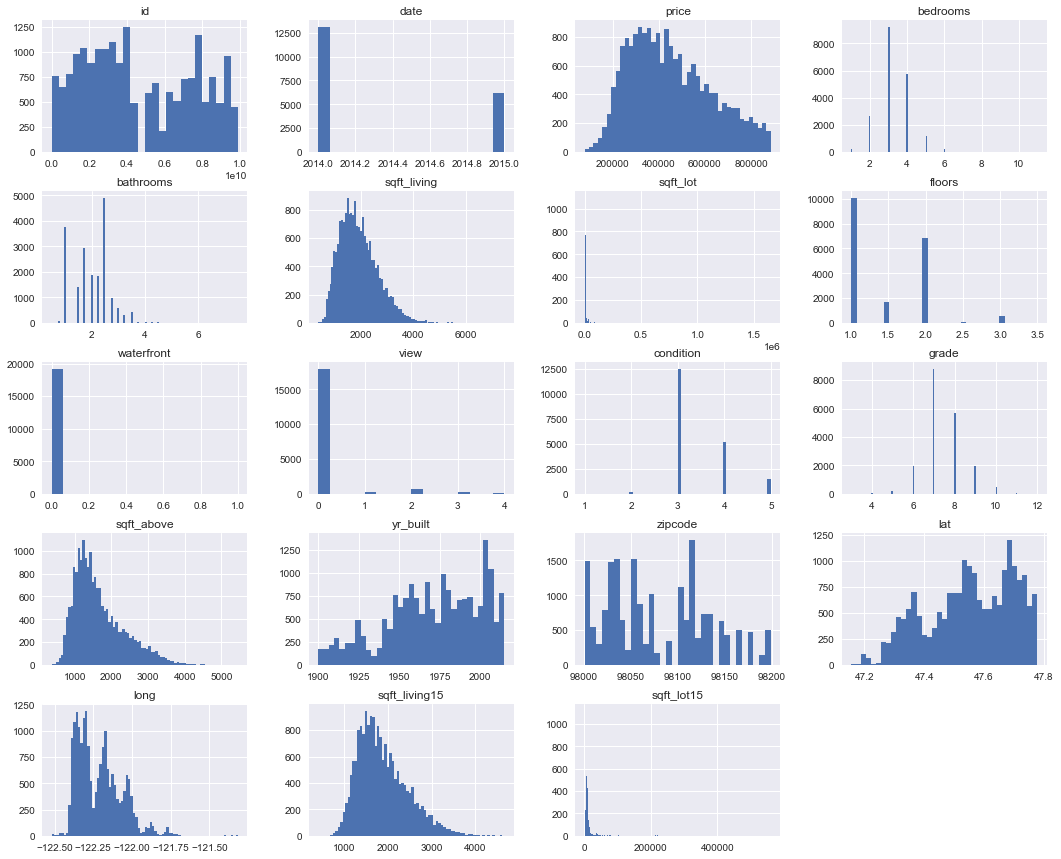

In [20]:
df.hist(figsize=(18,15), bins='auto');


In [21]:
#subset = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 
          #'grade']

In [22]:
#bedrooms, bathrooms, floors, waterfront, view, conditiono, grade are categorical 
#prce, sqft_living, sqft_above, sqfit_living15, sqft_lot15 are continuous and appear to be log
#normally distrubed 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19268 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19268 non-null  int64  
 1   date           19268 non-null  int64  
 2   price          19268 non-null  float64
 3   bedrooms       19268 non-null  int64  
 4   bathrooms      19268 non-null  float64
 5   sqft_living    19268 non-null  int64  
 6   sqft_lot       19268 non-null  int64  
 7   floors         19268 non-null  float64
 8   waterfront     19268 non-null  float64
 9   view           19268 non-null  float64
 10  condition      19268 non-null  int64  
 11  grade          19268 non-null  int64  
 12  sqft_above     19268 non-null  int64  
 13  sqft_basement  19268 non-null  object 
 14  yr_built       19268 non-null  int64  
 15  zipcode        19268 non-null  int64  
 16  lat            19268 non-null  float64
 17  long           19268 non-null  float64
 18  sqft_l

In [24]:
#bedrooms, bathrooms, floors, conditiono, grade, zipcode are categorical 
#bedrooms, bathrooms, floors, waterfront, view, conditiono, and grade should be changed to string
#df['bedrooms'] = df['bedrooms'].astype('str')
#df['bathrooms']= df['bathrooms'].astype('str')
#df['floors'] = df['floors'].astype('str')
#df['condition']=df['condition'].astype('str')
#df['grade']=df['grade'].astype('str')
df['zipcode']=df['zipcode'].astype('str')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19268 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19268 non-null  int64  
 1   date           19268 non-null  int64  
 2   price          19268 non-null  float64
 3   bedrooms       19268 non-null  int64  
 4   bathrooms      19268 non-null  float64
 5   sqft_living    19268 non-null  int64  
 6   sqft_lot       19268 non-null  int64  
 7   floors         19268 non-null  float64
 8   waterfront     19268 non-null  float64
 9   view           19268 non-null  float64
 10  condition      19268 non-null  int64  
 11  grade          19268 non-null  int64  
 12  sqft_above     19268 non-null  int64  
 13  sqft_basement  19268 non-null  object 
 14  yr_built       19268 non-null  int64  
 15  zipcode        19268 non-null  object 
 16  lat            19268 non-null  float64
 17  long           19268 non-null  float64
 18  sqft_l

In [25]:
len(df[df['sqft_basement'] == '?'])
#414 unknown values
#df[df['sqft_basement'] == '?'] = '0.0'
df['sqft_basement'].replace({"?": "0.0"}, inplace=True)
len(df[df['sqft_basement'] == '?'])
#replacing witht 0 as most common entry
#recasting as numereic 
df['sqft_basement'] = df['sqft_basement'].astype(float)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19268 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19268 non-null  int64  
 1   date           19268 non-null  int64  
 2   price          19268 non-null  float64
 3   bedrooms       19268 non-null  int64  
 4   bathrooms      19268 non-null  float64
 5   sqft_living    19268 non-null  int64  
 6   sqft_lot       19268 non-null  int64  
 7   floors         19268 non-null  float64
 8   waterfront     19268 non-null  float64
 9   view           19268 non-null  float64
 10  condition      19268 non-null  int64  
 11  grade          19268 non-null  int64  
 12  sqft_above     19268 non-null  int64  
 13  sqft_basement  19268 non-null  float64
 14  yr_built       19268 non-null  int64  
 15  zipcode        19268 non-null  object 
 16  lat            19268 non-null  float64
 17  long           19268 non-null  float64
 18  sqft_l

In [27]:
df['age']=df['date']-df['yr_built']
##adds a column representing the age of theh houose when it was sold 
#makes it categorical witht 10 bins 
#df['age']=pd.qcut(df['age'], q=10, precision=0)


In [28]:
#Check the elinearity assumption for chohsen features with target variable using scatter plots 
#DO I NEED TO DO SOMETHING ELSE HERE? 

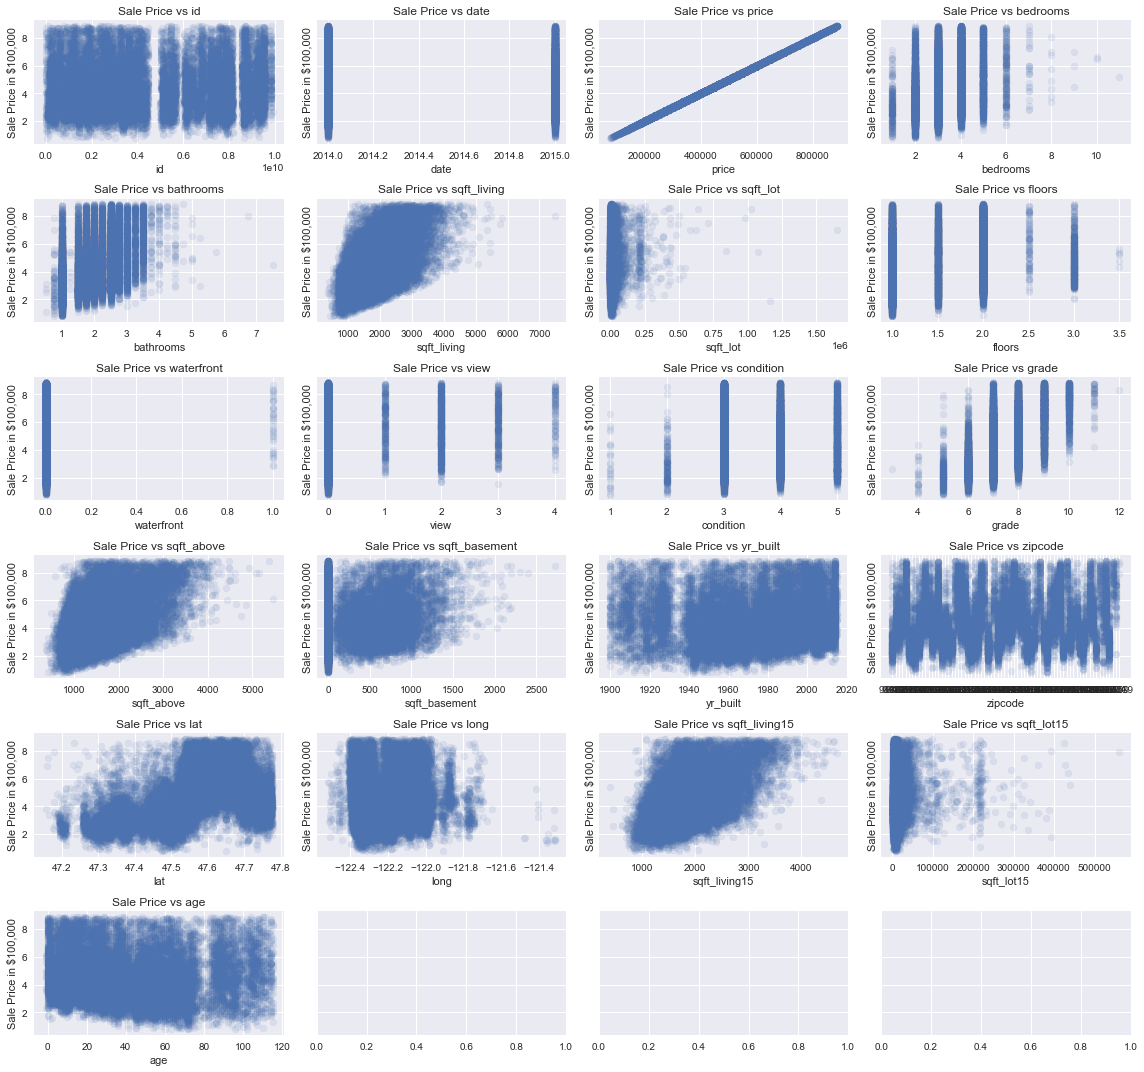

In [29]:

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

#sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, lat, long, sqft_living15, sqft_lot15

In [30]:
#bathroom, bedroom for linear? 

In [31]:
feats = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
         'grade', 'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age']
corr = df[feats].corr()
corr

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,age
date,1.000000,-0.008467,-0.026569,-0.028574,0.001448,-0.018540,-0.044848,-0.031974,-0.022155,0.006643,-0.031885,0.001009,-0.023395,-0.005394,0.009413
bedrooms,-0.008467,1.000000,0.496690,0.607491,0.021976,0.149961,0.021609,0.311227,0.476542,0.168254,-0.050827,0.146821,0.375237,0.019880,-0.168386
bathrooms,-0.026569,0.496690,1.000000,0.700786,0.050712,0.500301,-0.142266,0.593226,0.620501,0.559953,-0.033199,0.250691,0.510566,0.051441,-0.560367
sqft_living,-0.028574,0.607491,0.700786,1.000000,0.147125,0.323775,-0.075283,0.669570,0.841104,0.357810,-0.025196,0.290545,0.719971,0.162711,-0.358261
sqft_lot,0.001448,0.021976,0.050712,0.147125,1.000000,-0.025669,0.002117,0.076264,0.150674,0.032992,-0.101723,0.219824,0.142228,0.707947,-0.032968
floors,-0.018540,0.149961,0.500301,0.323775,-0.025669,1.000000,-0.282782,0.451579,0.523247,0.522012,0.024433,0.135469,0.258131,-0.030281,-0.522299
condition,-0.044848,0.021609,-0.142266,-0.075283,0.002117,-0.282782,1.000000,-0.181772,-0.181658,-0.351687,-0.019692,-0.094514,-0.128795,0.007329,0.350959
grade,-0.031974,0.311227,0.593226,0.669570,0.076264,0.451579,-0.181772,1.000000,0.677186,0.509437,0.058166,0.229514,0.642185,0.088913,-0.509939
sqft_above,-0.022155,0.476542,0.620501,0.841104,0.150674,0.523247,-0.181658,0.677186,1.000000,0.467581,-0.081755,0.395406,0.699862,0.167550,-0.467927
yr_built,0.006643,0.168254,0.559953,0.357810,0.032992,0.522012,-0.351687,0.509437,0.467581,1.000000,-0.162147,0.403134,0.371167,0.053791,-0.999871


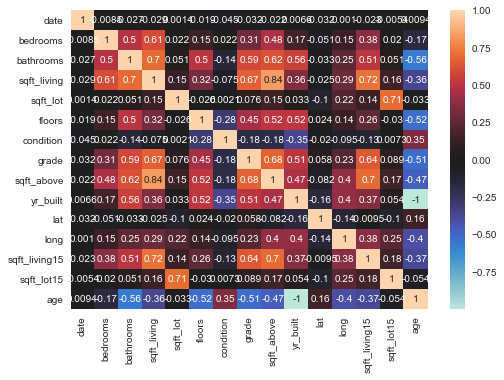

In [32]:
sns.heatmap(corr, center=0, annot=True);

In [33]:
#overlyhigh pairwise-correlation (r > .75) = sqft_living with sqft_above; sqft_lving with sqft_livingn15
#sqft_lot witht sqft_lot15, sqft_abovewithsqft_livingn15, sqft_lot witih hsqft_lot15

#get rid of sqft_living15 and sqft_lot15, sqft_above

df = df.drop(['sqft_living15'], axis=1)
df = df.drop(['sqft_lot15'], axis=1)
df = df.drop(['sqft_above'], axis=1)
df = df.drop(['yr_built'], axis=1)
df = df.drop(['id'], axis=1)
df = df.drop(['date'], axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19268 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19268 non-null  float64
 1   bedrooms       19268 non-null  int64  
 2   bathrooms      19268 non-null  float64
 3   sqft_living    19268 non-null  int64  
 4   sqft_lot       19268 non-null  int64  
 5   floors         19268 non-null  float64
 6   waterfront     19268 non-null  float64
 7   view           19268 non-null  float64
 8   condition      19268 non-null  int64  
 9   grade          19268 non-null  int64  
 10  sqft_basement  19268 non-null  float64
 11  zipcode        19268 non-null  object 
 12  lat            19268 non-null  float64
 13  long           19268 non-null  float64
 14  age            19268 non-null  int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 2.4+ MB


In [35]:

    
##sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, lat, long, sqft_living15, sqft_lot15

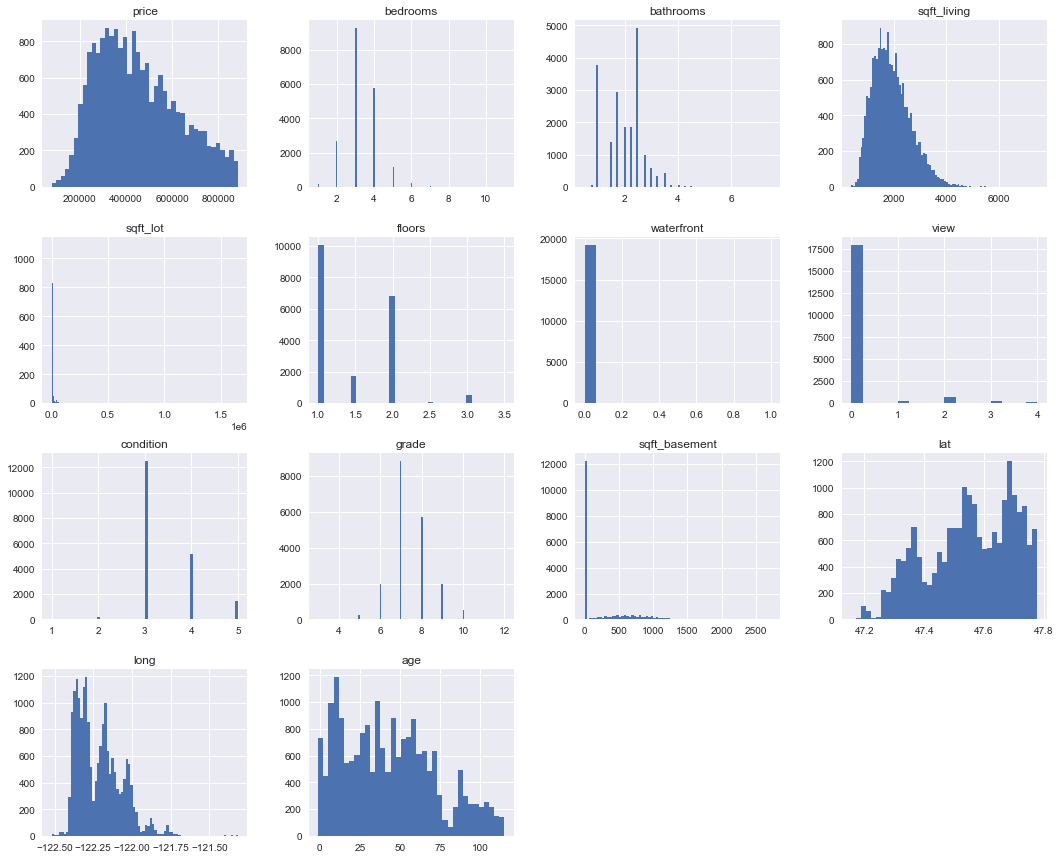

In [36]:
df.hist(figsize=(18,15), bins='auto');



#Transforming non-normal features with log
non_normal = ['sqft_living', 'lat', 'long',  'sqft_lot']
for feat in non_normal: 
    df[feat] = df[feat].map(lambda x: np.log(x))
df.hist(figsize=(18,15), bins='auto');


In [54]:
#normalizing the data 
def norm_feat(series):
    return (series - series.mean())/series.std()
#for feat in ['sqft_living', 'sqft_lot', 'lat', 'long']:
for feat in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
             'condition', 'grade', 'age', 'lat', 'long']:
    df[feat] = norm_feat(df[feat])
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,lat,long,age
count,1.926800e+04,1.926800e+04,1.926800e+04,1.926800e+04,1.926800e+04,1.926800e+04,19268.000000,1.926800e+04,1.926800e+04,1.926800e+04,19268.000000,1.926800e+04,1.926800e+04,1.926800e+04
mean,2.712809e-16,-1.128316e-16,4.755163e-15,4.430981e-17,2.218372e-19,-2.718244e-14,0.002076,-3.433377e-15,-9.166220e-15,-4.433459e-16,251.332468,-5.750480e-18,8.677579e-18,8.307082e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.045517,1.000000e+00,1.000000e+00,1.000000e+00,394.171474,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.099662e+00,-2.628795e+00,-2.203192e+00,-2.144926e+00,-3.537646e-01,-8.639318e-01,0.000000,-2.513129e-01,-3.733215e+00,-4.604820e+00,0.000000,-2.780884e+00,-2.137022e+00,-1.536795e+00
25%,-7.936119e-01,-3.431751e-01,-7.508916e-01,-7.448921e-01,-2.379330e-01,-8.639318e-01,0.000000,-2.513129e-01,-6.291030e-01,-4.715082e-01,0.000000,-7.097085e-01,-8.223485e-01,-8.473148e-01
50%,-1.462164e-01,-3.431751e-01,-2.474142e-02,-1.349765e-01,-1.738119e-01,-8.639318e-01,0.000000,-2.513129e-01,-6.291030e-01,-4.715082e-01,0.000000,6.339996e-02,-1.510259e-01,-1.233607e-01
75%,6.813240e-01,7.996347e-01,7.014088e-01,6.135563e-01,-1.045197e-01,1.001715e+00,0.000000,-2.513129e-01,9.229529e-01,5.618198e-01,480.000000,8.868374e-01,6.321838e-01,6.695415e-01
max,2.448995e+00,8.799304e+00,7.962911e+00,7.710756e+00,4.232914e+01,3.800186e+00,1.000000,6.564025e+00,2.475009e+00,4.695132e+00,2720.000000,1.564880e+00,6.282482e+00,2.462190e+00


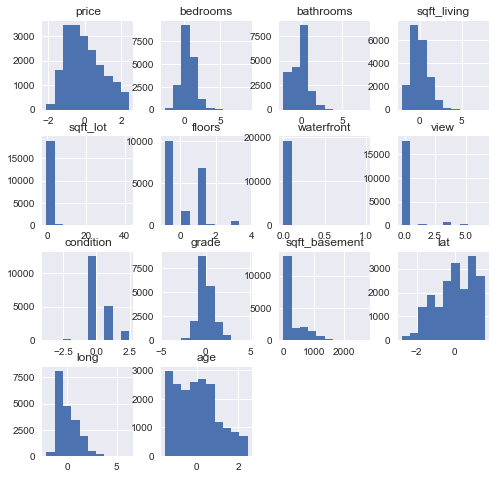

In [55]:
df.hist(figsize = [8,8]);


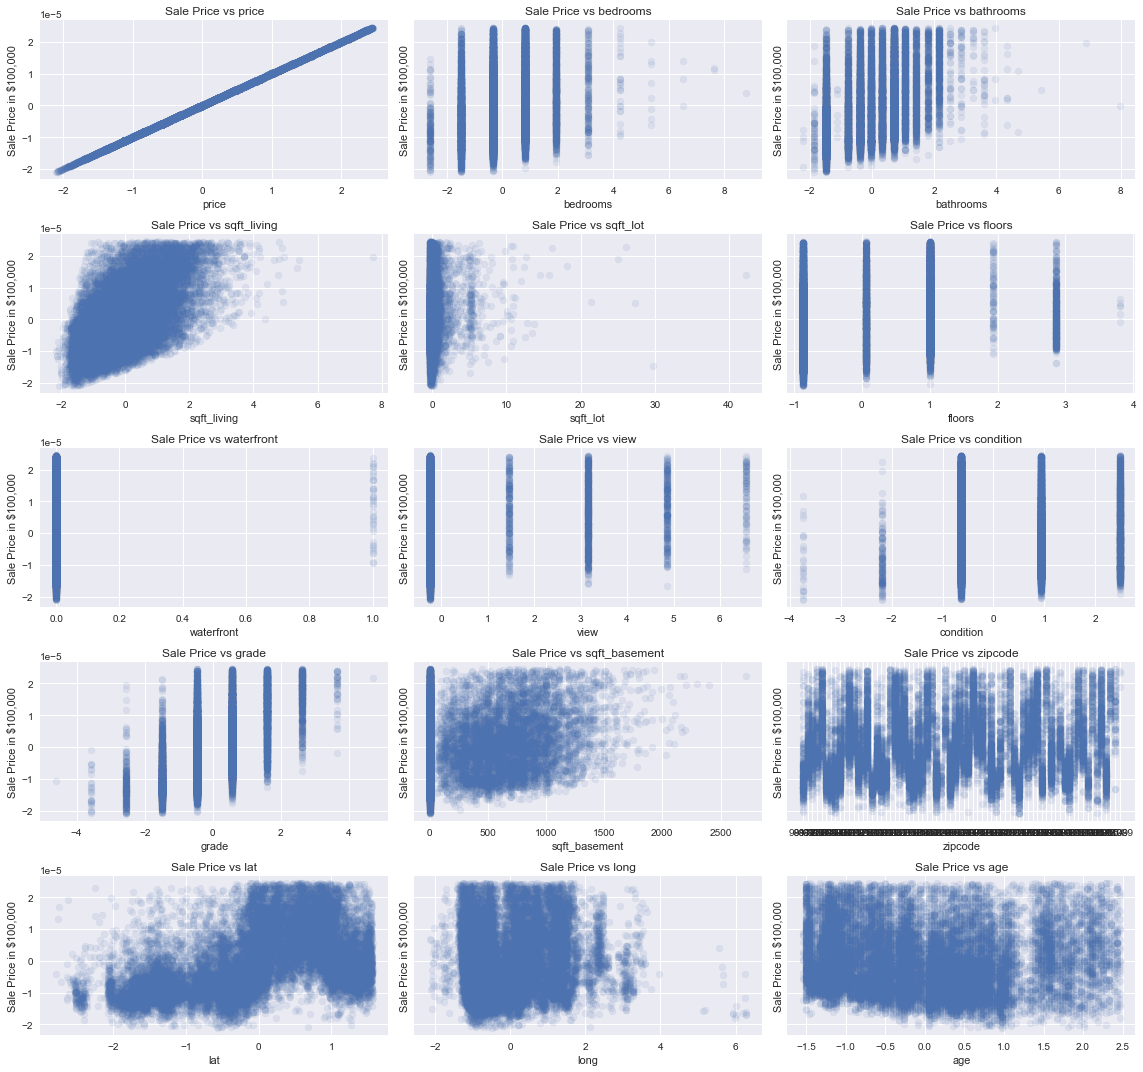

In [56]:

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()


In [40]:
#next step: one-hot encodng categorical columns

#bedrooms, bathrooms, floors, conditiono, grade, zipcode are categorical 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)

categoricals = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode', 'age']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [57]:
#create dummy variables for the categorical features

#dummies = pd.get_dummies(df[categoricals], prefix=categoricals, drop_first=True
categoricals = ['zipcode']
dummies = pd.get_dummies(df['zipcode'], prefix=categoricals, drop_first=True)
df_preprocessed = df.drop(categoricals, axis=1)

df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)
df_preprocessed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,['zipcode']_98146,['zipcode']_98148,['zipcode']_98155,['zipcode']_98166,['zipcode']_98168,['zipcode']_98177,['zipcode']_98178,['zipcode']_98188,['zipcode']_98198,['zipcode']_98199
0,-1.289573,-0.343175,-1.477042,-1.022126,-0.221127,-0.863932,0.0,-0.251313,-0.629103,-0.471508,...,0,0,0,0,0,0,1,0,0,0
1,0.489920,-0.343175,0.338334,0.904652,-0.179965,1.001715,0.0,-0.251313,-0.629103,-0.471508,...,0,0,0,0,0,0,0,0,0,0
2,-1.525450,-1.485985,-1.477042,-1.590457,-0.108657,-0.863932,0.0,-0.251313,-0.629103,-1.504836,...,0,0,0,0,0,0,0,0,0,0
3,0.861469,0.799635,1.427559,0.059088,-0.237933,-0.863932,0.0,-0.251313,2.475009,-0.471508,...,0,0,0,0,0,0,0,0,0,0
4,0.332293,-0.343175,-0.024741,-0.329041,-0.158299,-0.863932,0.0,-0.251313,-0.629103,0.561820,...,0,0,0,0,0,0,0,0,0,0


In [58]:
import statsmodels.api as sm
predictors = df_preprocessed.drop('price', axis=1)

predictors_int = sm.add_constant(predictors)
model = sm.OLS(df['price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1044.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:41:22   Log-Likelihood:                -10984.
No. Observations:               19268   AIC:                         2.213e+04
Df Residuals:                   19185   BIC:                         2.279e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5596      0.050    -11.143      0.000      -0.658      -0.461
bedrooms             -0.0222      0.004     -5.381      0.000      -0.030      -0.014
bathrooms             0.0483      0.005      9.090      0.000       0.038       0.059
sqft_living           0.4682      0.006     72.396      0.000       0.456       0.481
sqft_lot              0.0641      0.003     18.857      0.000       0.057       0.071
floors               -0.0446      0.005     -9.181      0.000      -0.054      -0.035
waterfront            0.8274      0.073     11.332      0.000       0.684       0.970
view                  0.0939      0.003     27.554      0.000       0.087       0.101
condition             0.0748      0.003     21.536      0.000       0.068       0.082
grade                 0.2377      0.005     46.514      0.000       0.228       0.248
sqft_basement        -0.0002   1.11e-05    -22.520      0.000      -0.000      -0.000
lat                   0.1606      0.026      6.282      0.000       0.110       0.211
long                 -0.0366      0.018     -2.031      0.042      -0.072      -0.001
age                   0.0795      0.005     15.184      0.000       0.069       0.090
['zipcode']_98002     0.0019      0.039      0.048      0.961      -0.074       0.078
['zipcode']_98003    -0.0478      0.035     -1.374      0.169      -0.116       0.020
['zipcode']_98004     2.2706      0.075     30.393      0.000       2.124       2.417
['zipcode']_98005     1.5186      0.071     21.264      0.000       1.379       1.659
['zipcode']_98006     1.2218      0.058     20.895      0.000       1.107       1.336
['zipcode']_98007     1.0782      0.073     14.862      0.000       0.936       1.220
['zipcode']_98008     1.0364      0.069     15.069      0.000       0.902       1.171
['zipcode']_98010     0.5500      0.060      9.145      0.000       0.432       0.668
['zipcode']_98011     0.3852      0.089      4.312      0.000       0.210       0.560
['zipcode']_98014     0.3064      0.098      3.131      0.002       0.115       0.498
['zipcode']_98019     0.1973      0.096      2.045      0.041       0.008       0.386
['zipcode']_98022     0.1714      0.052      3.266      0.001       0.069       0.274
['zipcode']_98023    -0.1304      0.032     -4.060      0.000      -0.193      -0.067
['zipcode']_98024     0.6344      0.087      7.303      0.000       0.464       0.805
['zipcode']_98027     0.9333      0.058     16.014      0.000       0.819       1.048
['zipcode']_98028     0.2856      0.087      3.282      0.001       0.115       0.456
['zipcode']_98029     1.1006      0.067     16.473      0.000       0.970       1.232
['zipcode']_98030    -0.0079      0.038     -0.205      0.838      -0.083       0.067
['zipcode']_98031    -0.0144      0.040     -0.359      0.720      -0.093

#stepwise selection
In stepwise selection, you start with an empty model (which only includes the intercept), and each time, the variable that has an associated parameter estimate with the lowest p-value is added to the model (forward step). After adding each new variable in the model, the algorithm will look at the p-values of all the other parameter estimates which were added to the model previously, and remove them if the p-value exceeds a certain value (backward step). The algorithm stops when no variables can be added or removed given the threshold values.

In [46]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    count = 0
    while count <= len(X):
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        count = count+1
    return included

In [47]:
result = stepwise_selection(predictors, df_preprocessed['price'], verbose=True)
print('resulting features:')
print(result)

Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  age                            with p-value 0.0
Add  lat                            with p-value 0.0
Add  ['zipcode']_98155              with p-value 1.29818e-147
Add  ['zipcode']_98133              with p-value 3.9941e-156
Add  ['zipcode']_98004              with p-value 1.33102e-120
Add  view                           with p-value 4.20297e-127
Add  ['zipcode']_98028              with p-value 3.81684e-121
Add  ['zipcode']_98040              with p-value 3.00795e-109
Add  ['zipcode']_98019              with p-value 6.13414e-94
Add  ['zipcode']_98034              with p-value 8.01965e-96
Add  ['zipcode']_98011              with p-value 4.8441e-100
Add  ['zipcode']_98125              with p-value 1.38489e-112
Add  ['zipcode']_98072              with p-value 2.85716e-111
Add  condition                      with p-value 2.66936e-90
Add  ['zipcode']_98177              with p-value 

In [59]:
#Build the final model again in Statsmodel
X = df_preprocessed.drop(['price'], axis=1)
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(df_preprocessed['price'], X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1044.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:41:37   Log-Likelihood:                -10984.
No. Observations:               19268   AIC:                         2.213e+04
Df Residuals:                   19185   BIC:                         2.279e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5596      0.050    -11.143      0.000      -0.658      -0.461
sqft_living           0.4682      0.006     72.396      0.000       0.456       0.481
grade                 0.2377      0.005     46.514      0.000       0.228       0.248
age                   0.0795      0.005     15.184      0.000       0.069       0.090
lat                   0.1606      0.026      6.282      0.000       0.110       0.211
['zipcode']_98155     0.2388      0.085      2.800      0.005       0.072       0.406
['zipcode']_98133     0.3010      0.082      3.674      0.000       0.140       0.462
['zipcode']_98004     2.2706      0.075     30.393      0.000       2.124       2.417
view                  0.0939      0.003     27.554      0.000       0.087       0.101
['zipcode']_98028     0.2856      0.087      3.282      0.001       0.115       0.456
['zipcode']_98040     1.9613      0.067     29.088      0.000       1.829       2.093
['zipcode']_98019     0.1973      0.096      2.045      0.041       0.008       0.386
['zipcode']_98034     0.5707      0.080      7.108      0.000       0.413       0.728
['zipcode']_98011     0.3852      0.089      4.312      0.000       0.210       0.560
['zipcode']_98125     0.5750      0.079      7.246      0.000       0.419       0.730
['zipcode']_98072     0.5438      0.089      6.084      0.000       0.369       0.719
condition             0.0748      0.003     21.536      0.000       0.068       0.082
['zipcode']_98177     0.6368      0.086      7.381      0.000       0.468       0.806
['zipcode']_98022     0.1714      0.052      3.266      0.001       0.069       0.274
['zipcode']_98077     0.6104      0.093      6.531      0.000       0.427       0.794
['zipcode']_98014     0.3064      0.098      3.131      0.002       0.115       0.498
sqft_lot              0.0641      0.003     18.857      0.000       0.057       0.071
['zipcode']_98178     0.0484      0.049      0.981      0.327      -0.048       0.145
['zipcode']_98168     0.0029      0.048      0.061      0.951      -0.091       0.096
sqft_basement        -0.0002   1.11e-05    -22.520      0.000      -0.000      -0.000
['zipcode']_98112     1.7373      0.072     23.980      0.000       1.595       1.879
['zipcode']_98006     1.2218      0.058     20.895      0.000       1.107       1.336
['zipcode']_98116     1.2260      0.060     20.522      0.000       1.109       1.343
['zipcode']_98119     1.6737      0.075     22.412      0.000       1.527       1.820
['zipcode']_98005     1.5186      0.071     21.264      0.000       1.379       1.659
['zipcode']_98106     0.3249      0.053      6.139      0.000       0.221       0.429
['zipcode']_98058     0.1061      0.043      2.490      0.013       0.023       0.190
['zipcode']_98055     0.0677      0.045      1.499      0.134      -0.021

##Regression Model Validation, train-test tsplit 
What you'll be doing here, is take a sample of the data that serves as input to "train" our model - fit a linear regression and compute the parameter estimates for our variables, and calculate how well our predictive performance is doing comparing the actual targets  𝑦  and the fitted  𝑦̂   obtained by our model.

In [60]:
from sklearn.model_selection import train_test_split
y = df_preprocessed[['price']]
X = df_preprocessed.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [63]:
#Look at the residuals and calculate the MSE for training and test sets:  
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.18384516959073777
Test Mean Squarred Error: 0.1815602636043237


In [68]:
#cross-validation
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring=mse)
cv_10_results.mean()


0.18628987448777862